# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

In [2]:
df = pd.read_csv(r'amazon_vfl_reviews.csv')

In [3]:
df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [4]:
df.shape

(2782, 5)

This datasheet comprises of 2782 Rows and 5 Columns

# Data Cleaning

In [5]:
df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

There are 4 null values in review column

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(2778, 5)

In [7]:
len(df['name'].unique())

122

In [8]:
df['name'].sample(n=3)

1144          Dettol-Disinfectant-Cleaner-Home-Fresh
511         Titan-Analog-Black-Dial-Watch-NK1730SL02
2551    Fastrack-Analog-Silver-Dial-Watch-NK9332PP06
Name: name, dtype: object

In [9]:
def getbrand(x):
    return x.split('-')[0]
df['brand']=df['name'].apply(getbrand)
df.head(-10)
        

,asin,name,date,rating,review,brand
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,Mamaearth
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,Mamaearth
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,Mamaearth
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,Mamaearth
...,...,...,...,...,...,...
2763,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-08-23,5,Been using it for 45 years . The best soap ever .,Mysore
2764,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-05-09,5,Fantastic,Mysore
2765,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.,Mysore
2766,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap,Mysore


In [10]:
a=df['brand'].unique()
df['brand'].unique()


array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

In [11]:
df['brand']=df['brand'].str.replace("PATANJALI","Patanjali")
df['brand']=df['brand'].str.replace("MYSORE","Mysore")

In [12]:
df['brand'].unique()


array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'Dettol', 'Savlon', 'Cinthol', 'Britannia', 'NutriChoice',
       'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack', 'Reflex',
       'Mysore'], dtype=object)

In [13]:
len(df['brand'].unique())


24

In [14]:
df1 = pd.DataFrame(df.groupby('brand')['asin'].count().reset_index())
df1.columns=['brand','count']
sort_df = df1.sort_values(['count'],ascending=True)

fig = px.bar(sort_df.iloc[:5],y='brand',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='Top 5 Names of brands with least number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [15]:
df1 = pd.DataFrame(df.groupby('name')['asin'].count().reset_index())
df1.columns=['name','count']
sort_df = df1.sort_values(['count'],ascending=True)

fig = px.bar(sort_df.iloc[:5],y='name',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='Top 5 Names of product with least number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [16]:
df1 = pd.DataFrame(df.groupby('brand')['asin'].count().reset_index())
df1.columns=['brand','count']
sort_df = df1.sort_values(['count'],ascending=False)

fig = px.bar(sort_df.iloc[:5],y='brand',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='Top 5 Names of brands with most number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [34]:
df1 = pd.DataFrame(df.groupby('name')['asin'].count().reset_index())
df1.columns=['name','count']
sort_df = df1.sort_values(['count'],ascending=False)

fig = px.bar(sort_df.iloc[:5],y='name',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='Top 5 Names of product with most number of reviews',title_x=0.5,
                  template='plotly_dark')
fig.save('save.png')
fig.show()

AttributeError: 'Figure' object has no attribute 'save'

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = stopwords.words('english')

corpus = []
for i in range(0,len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)
    

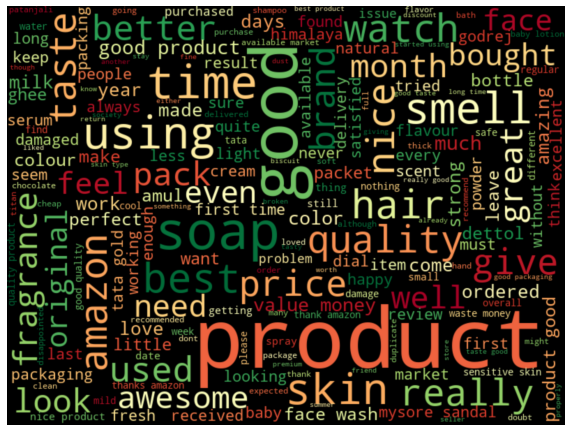

In [20]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()


In [21]:
rating_df = pd.DataFrame(df['rating'].value_counts().reset_index())
rating_df.columns=['rating','count']

fig = px.bar(rating_df,x='rating',y='count',
            color_discrete_sequence=['purple'])
fig.update_layout(title_text='Distribution of Ratings',title_x=0.5
                  ,template='plotly_dark')
fig.show()

In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score'] = df['review'].\
   apply(lambda x : polarity(x))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity'] = df['polarity_score'].\
   map(lambda x: sentiment(x))

In [23]:
fig = go.Figure(data=[go.Pie(labels=df['polarity'].value_counts().index.tolist(),
                             values=df['polarity'].value_counts().tolist(),
                            marker=dict(colors=['#006400','#8B0000','#add8e6']))])

fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
                  template='plotly_dark')
fig.show()


In [24]:
def get_data(df,senti):
    s_df = df[df['polarity']==senti].reset_index()
    
    s_corpus = []
    for i in range(0,len(s_df)):
        text = re.sub('[^a-zA-Z]', ' ', s_df['review'][i])
        text = text.lower()
        text = text.split()
        text = [word for word in text if not word in stop_words]
        text = ' '.join(text)
        s_corpus.append(text)
    return s_corpus

p_corpus = get_data(df,'positive')
n_corpus = get_data(df,'negative')
nt_corpus = get_data(df,'neutral')

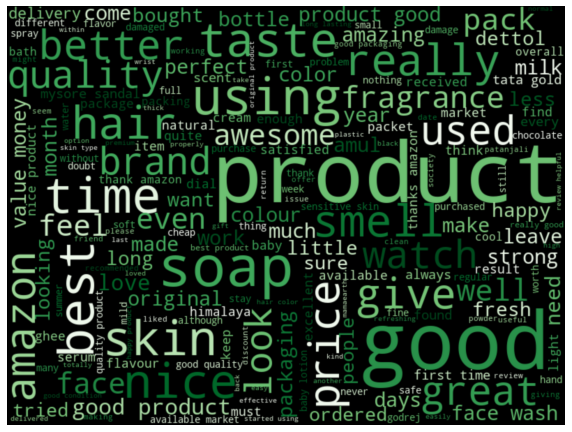

In [25]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Greens', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(p_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

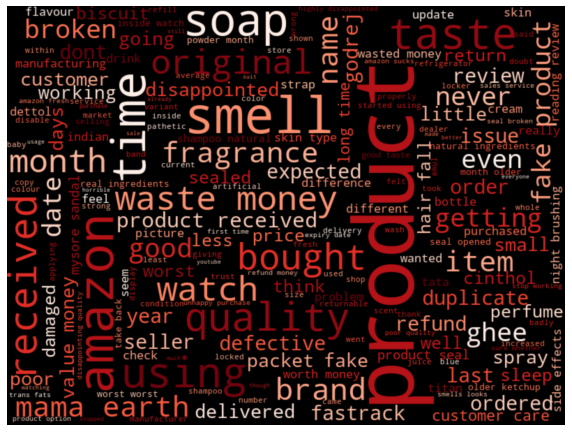

In [26]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Reds', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(n_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

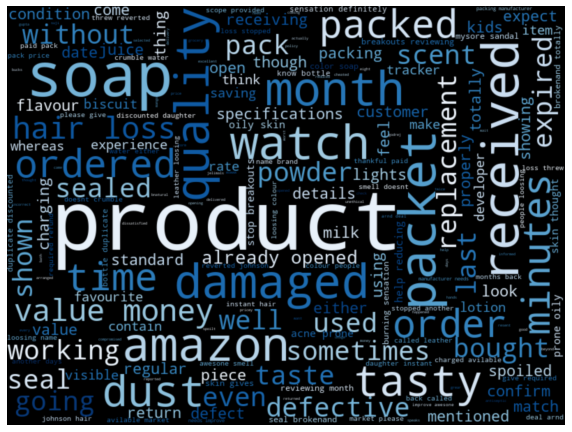

In [27]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(nt_corpus))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

In [28]:
df2=pd.DataFrame(df.groupby('name')['polarity_score'].median().reset_index())
df2.columns=['name','polarity_score']
df2

,name,polarity_score
0,Amul-Butter-Pasteurised-100g-Pack,0.200000
1,Amul-Cacao-Chocolate-125g-Pack,0.125000
2,Amul-Cheese-Slices-200g-Pack,0.417857
3,Amul-Cow-Ghee-500ml,0.244352
4,Amul-Fresh-Cream-250ml,0.298571
...,...,...
117,Titan-Karishma-Analog-Black-NK1578SM04,0.250000
118,Titan-Karishma-Analog-Black-Watch-NK1639SM02,0.438260
119,Titan-Karishma-Analog-Blue-Watch-1774SM01,0.294798
120,Titan-Karishma-Analog-Champagne-Watch-NK1580YL05,0.234245


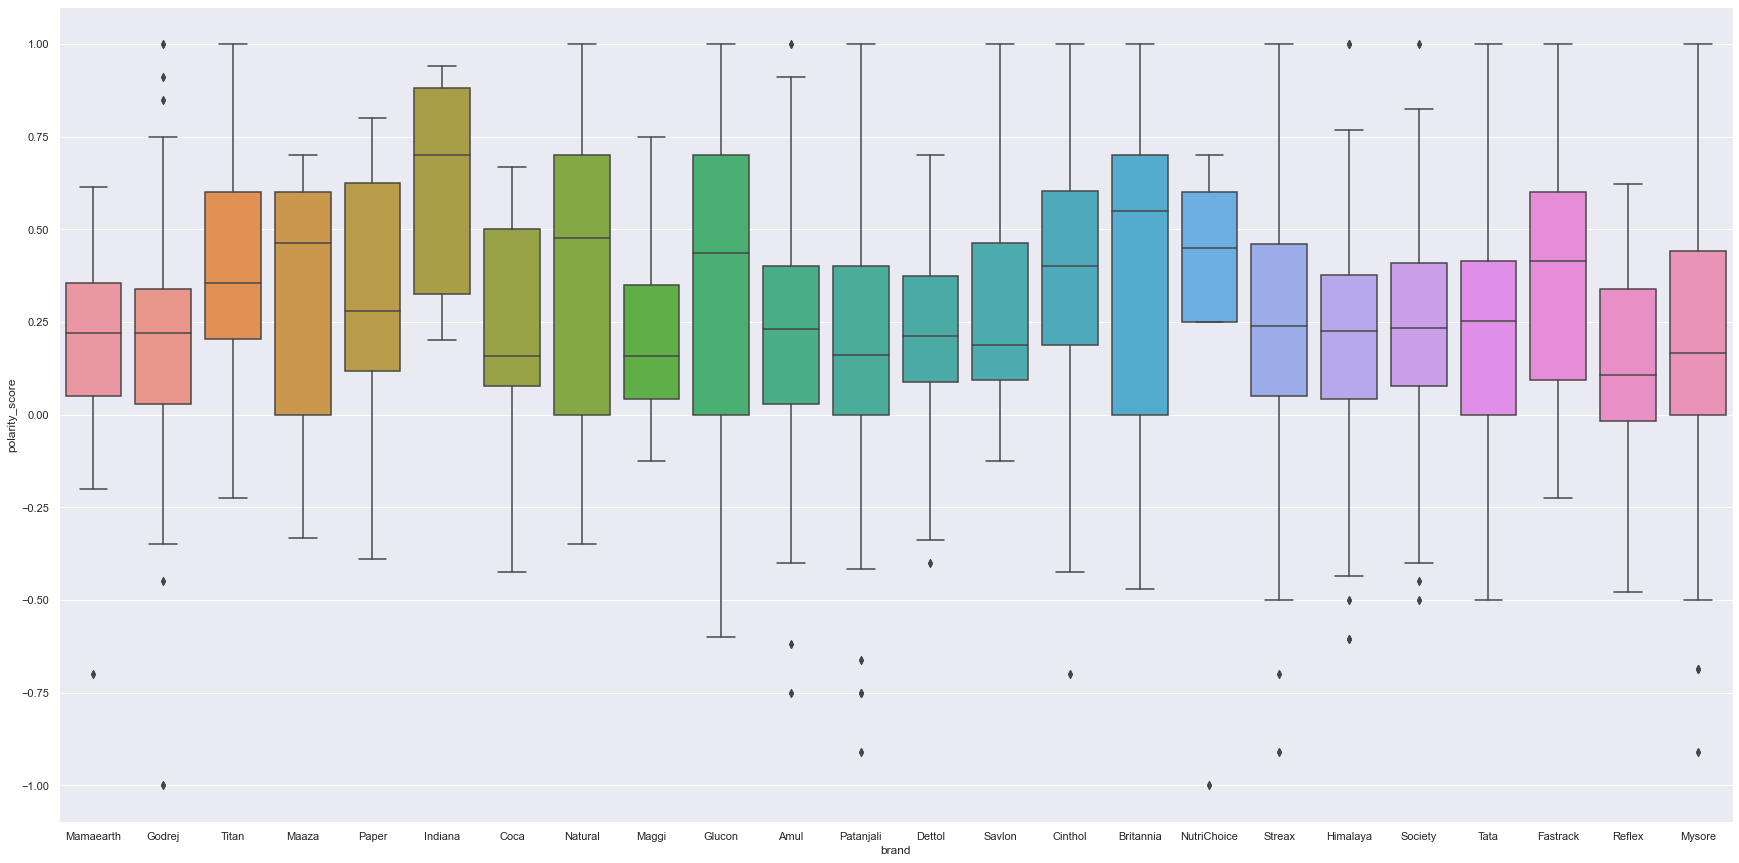

In [32]:
import seaborn as sns
box=sns.boxplot(x='brand',y='polarity_score',data=df)
fig1=box.get_figure();
fig1.savefig('save1.png') 
# plt.xlabel("Brand")
sns.set(rc = {'figure.figsize':(60,40)})

In [30]:
df3=pd.DataFrame(df.groupby(['brand','name'])['polarity_score'].median().reset_index())
df3.columns=['brand','name','polarity_score']

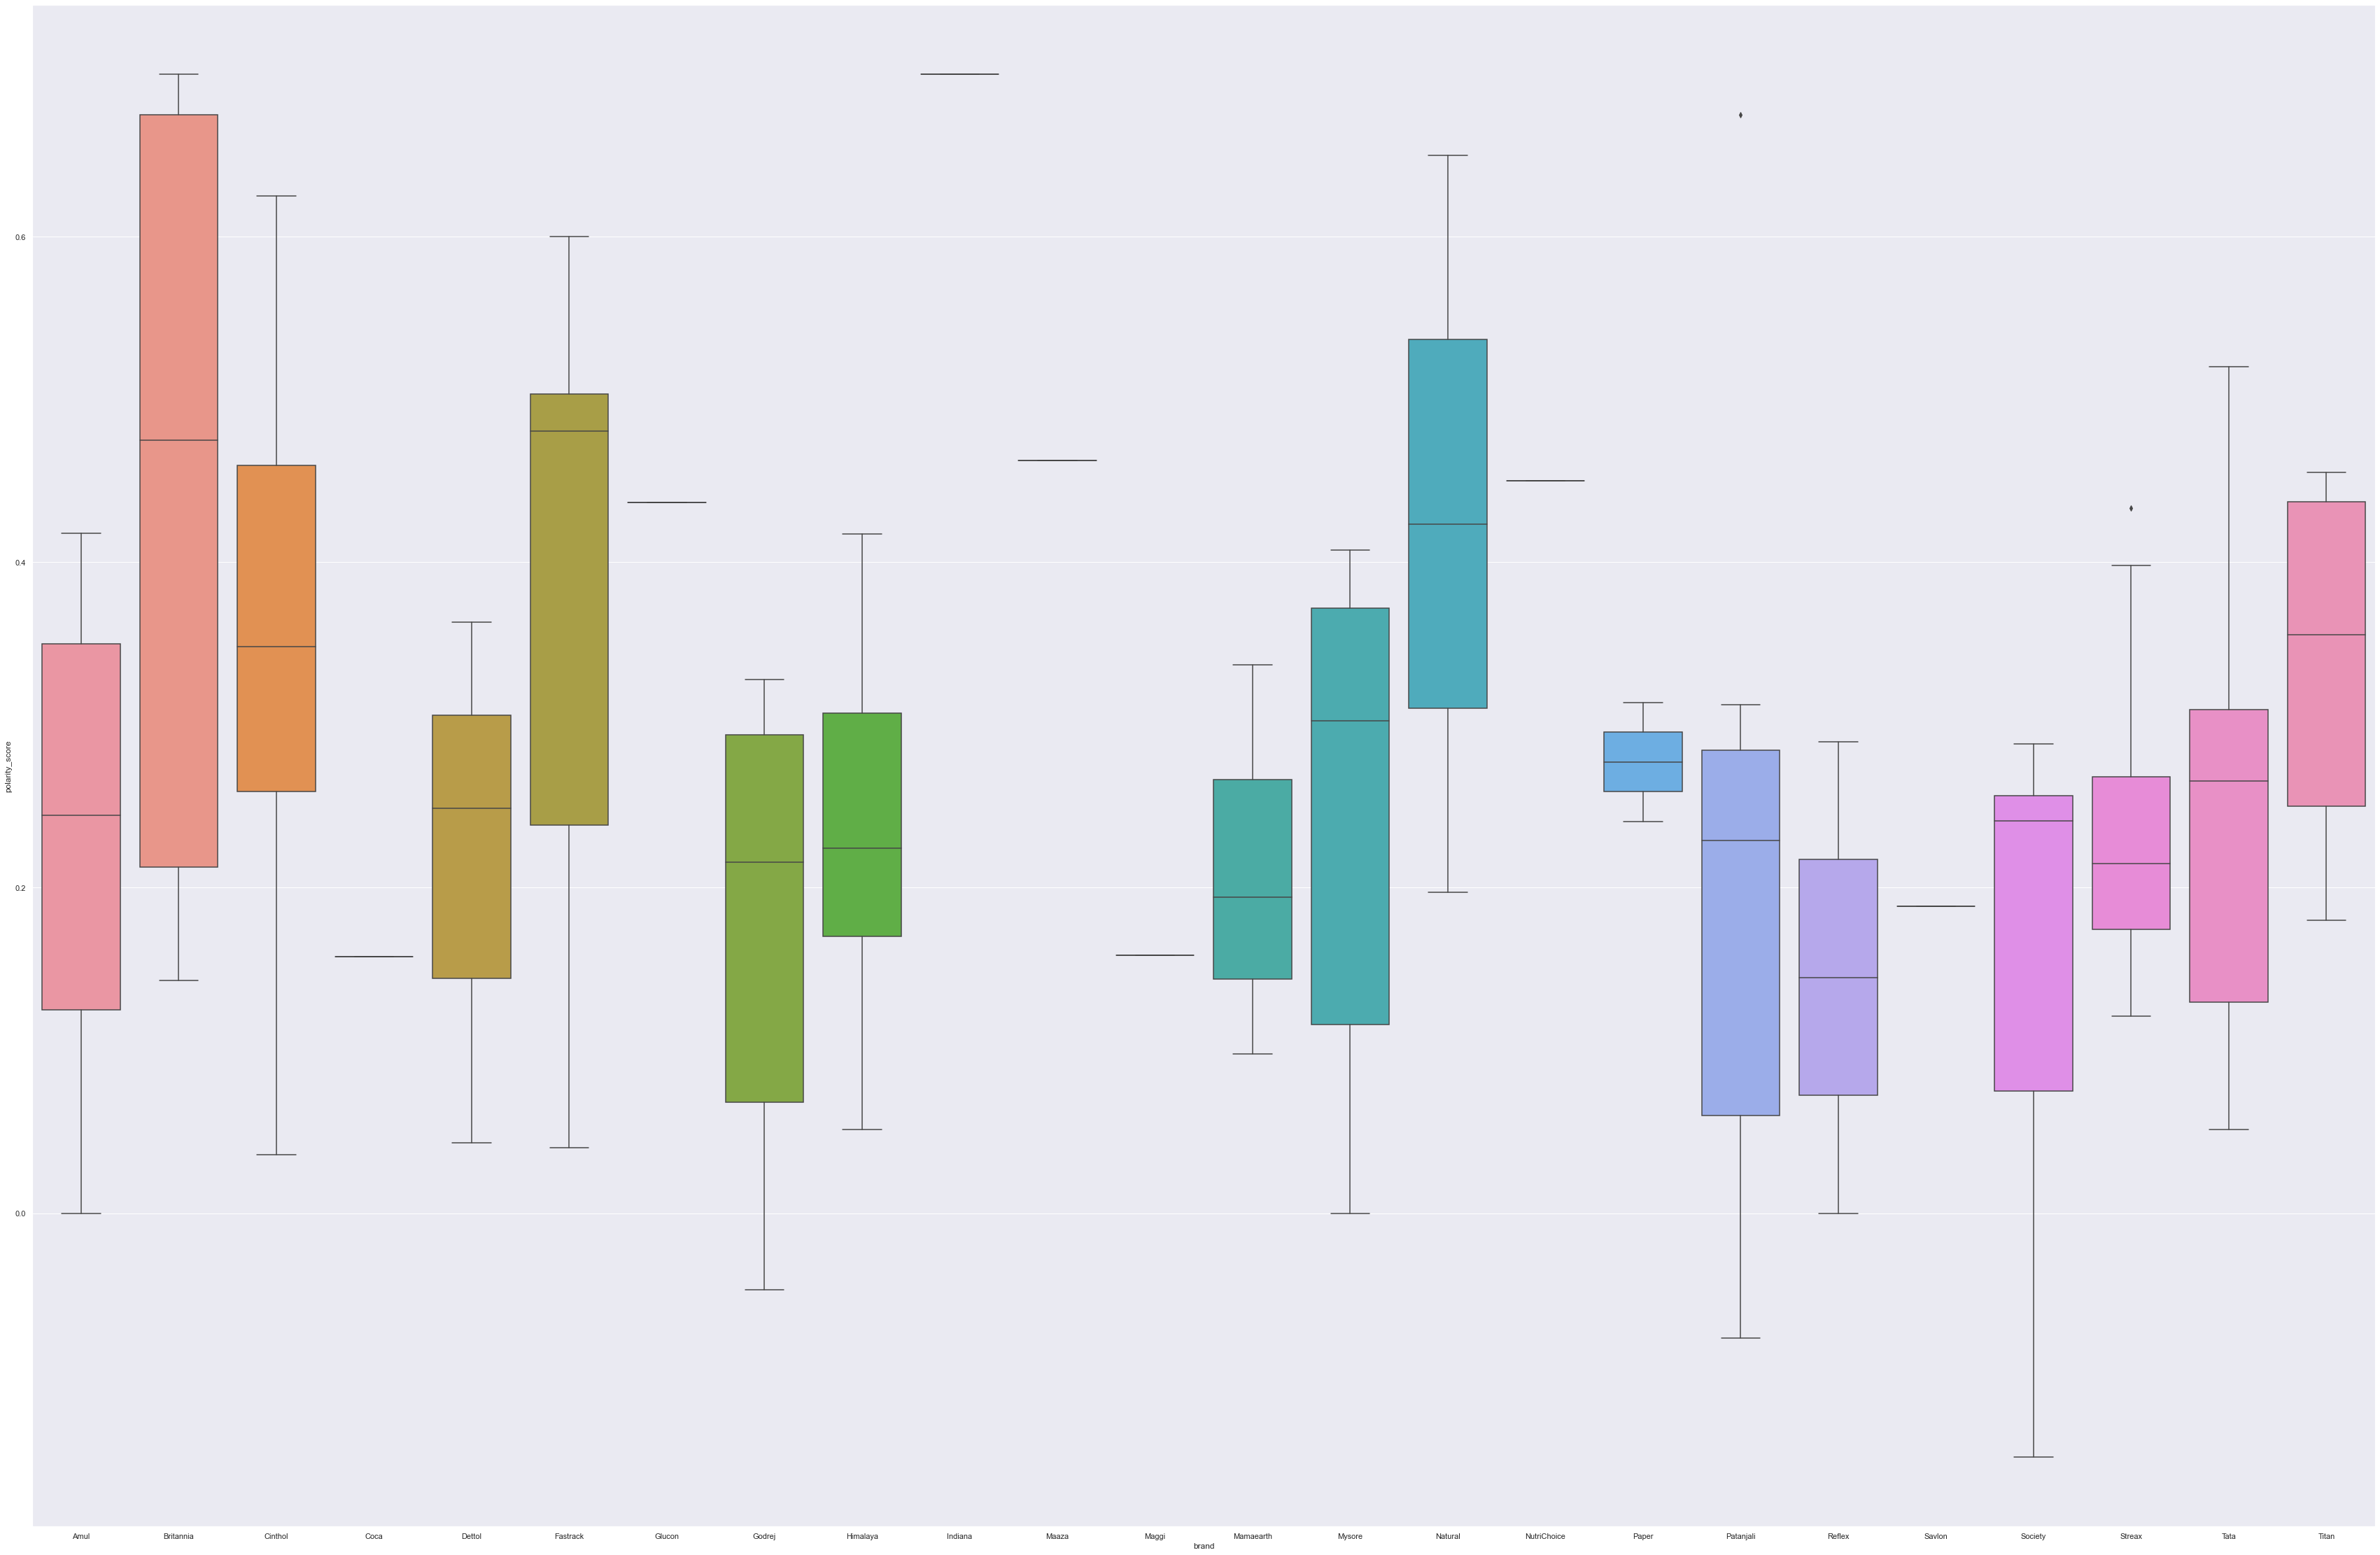

In [35]:
box=sns.boxplot(x='brand',y='polarity_score',data=df3)
fig1=box.get_figure();
fig1.savefig('save2.png')
sns.set(rc = {'figure.figsize':(60,30)})

In [54]:
from ipywidgets import interact_manual

@interact_manual
def vix(x=list(df3['brand'].unique())):
        df4=df3[df3['brand'] == x]
        if(len(df4) ==1):
                fig=px.box(df4,x='name',y='polarity_score', width=800, height=400)
        else:
                fig=px.line(df4,x='name',y='polarity_score', width=800, height=400)
        
        fig.show()

interactive(children=(Dropdown(description='x', options=('Amul', 'Britannia', 'Cinthol', 'Coca', 'Dettol', 'Fa…

In [ ]:
# import sweetviz as sz
# my_report=sz.compare([df])
# my_report.show_html("report.html")

In [ ]:
# import pandas_profiling
# profile = pandas_profiling.ProfileReport(df)
# profile.to_notebook_iframe()
# profile.to_file("output.html")

In [59]:
import  plotly.express as px
from ipywidgets import interact_manual
fig1 = px.box(df3,x='brand',y='polarity_score',color='brand')

# fig1=box.get_figure();
# fig1.savefig('save2.png')
# sns.set(rc = {'figure.figsize':(60,30)}) # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig1)
])

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [48]:
df4=pd.DataFrame(df3.groupby(['brand'])['polarity_score'].median().reset_index())
df4.columns=['brand','polarity_score']


In [53]:
fig=px.bar(df4,x='brand',y='polarity_score');
fig.show()